# Вывод графиков для данных, полученных из KSP

## Colab

In [ ]:
!git clone https://github.com/xsestech/graviton.git

## Библиотеки

### Установка библиотек

In [ ]:
!pip install matplotlib joblib numpy

### Импорт

In [1]:
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np

## Константы

In [2]:
DATA_PATH = '../data'
TIME_RANGE = 1  # В часах

## Графики

Загрузим объекты

In [3]:
velocities = np.array(joblib.load(os.path.join(DATA_PATH, "velocities.joblib")))
times = np.array(joblib.load(os.path.join(DATA_PATH, "time.joblib")))

In [4]:
math_v = joblib.load(os.path.join(DATA_PATH, "math_v.joblib"))
math_t = joblib.load(os.path.join(DATA_PATH, "math_t.joblib"))

Найдем момент T0, и вычтем его из всего времени, переведём время в часы

In [5]:
times -= times[np.argmax(velocities)]
times /= 60

Найдем все индексы, которые входят во временной диапазон

In [6]:
index_in_time_range = np.argwhere(np.abs(times) <= TIME_RANGE * 60)

Переведем скорость в км/с

In [7]:
velocities /= 1000

Получим график

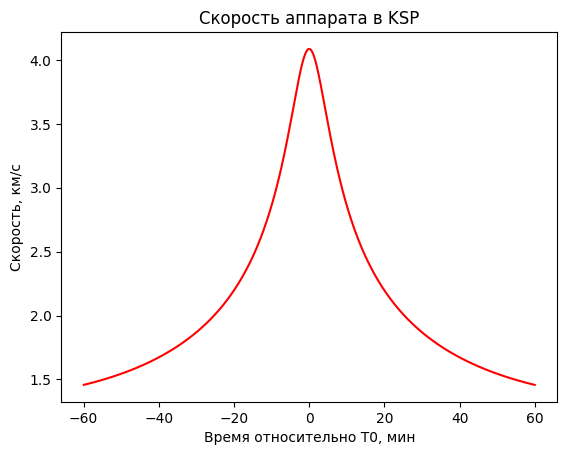

In [8]:
plt.plot(times[index_in_time_range], velocities[index_in_time_range], 'r')
plt.title("Скорость аппарата в KSP")
plt.ylabel("Скорость, км/с")
plt.xlabel("Время относительно T0, мин")
plt.show()

### Сравнительный график

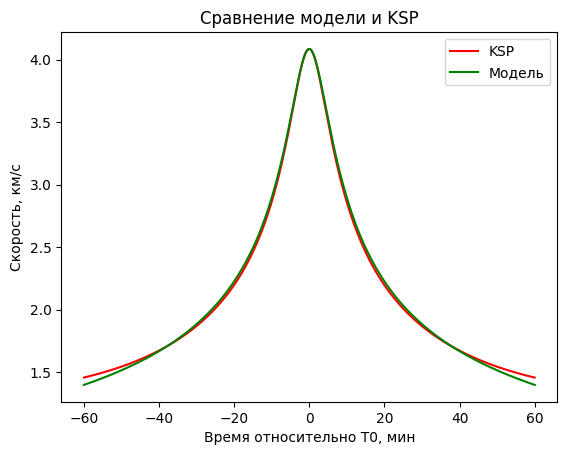

In [10]:
plt.plot(times[index_in_time_range], velocities[index_in_time_range], 'r', label='KSP')
plt.plot(math_t, math_v, 'g', label='Модель')
plt.title("Сравнение модели и KSP")
plt.ylabel("Скорость, км/с")
plt.xlabel("Время относительно T0, мин")
plt.legend(loc='best')
plt.show()